## Import

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = '../Data/movie_data.csv'
movie_data = pd.read_csv(file_path)
movie_data.head()

,Title,Release time,Age rating,Runtime,Language,IMDb Rating,IMDb Votes,Action/Adventure,Animation,Biography/History/War,...,Drama,Fantasy/Sci-Fi,Horror/Thriller/Mystery,Kids/Family,Music/Musical,Other,Romance,Win,Nomination,Age rating quantification
0,Goon Squad,2024-01-18,NC-17,83.0,English,6.1,12398.815824,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,5
1,The Phantom Warrior,2024-02-20,R,83.0,English,2.6,532.000000,True,False,False,...,False,True,False,False,False,False,False,0.0,0.0,4
2,Beyond the Lake,2024-01-26,G,98.0,English,6.1,31.000000,False,False,False,...,False,False,False,False,False,False,False,0.0,0.0,1
3,Crimes of Fashion: Killer Clutch,2024-03-15,PG,84.0,"English, French",5.8,503.000000,False,False,False,...,True,False,True,False,False,False,False,0.0,0.0,2
4,Love on the Danube: Love Song,2024-09-10,G,84.0,English,5.8,175.000000,False,False,False,...,False,False,False,False,False,False,True,0.0,0.0,1


## Câu 3: Xếp hạng tuổi (Age rating) ảnh hưởng thế nào đến mức độ phổ biến (số lượt bình chọn IMDb Votes)?

#### Lợi ích của việc trả lời câu hỏi này:
- Hiểu tác động của đối tượng khán giả mục tiêu đến mức độ phổ biến của phim.
- Giúp điều chỉnh nội dung phù hợp với đối tượng mục tiêu để tăng sức hút thị trường.

In [6]:
# Nhóm dữ liệu theo "Age rating" và tính toán các thống kê mô tả của số lượt bình chọn IMDb
age_rating_stats = movie_data.groupby('Age rating')['IMDb Votes'].describe()
age_rating_stats

,count,mean,std,min,25%,50%,75%,max
Age rating,,,,,,,,
G,174.0,1799.956446,3365.271851,5.0,200.75,606.500000,1074.500000,12398.815824
NC-17,24.0,6830.483571,6190.431878,9.0,51.25,12398.815824,12398.815824,12398.815824
PG,268.0,7294.250005,24076.574215,6.0,79.25,549.000000,6381.000000,251438.000000
PG-13,444.0,15851.976712,52051.124488,5.0,236.25,1487.000000,12398.815824,571413.000000
R,783.0,14361.764841,46251.038832,6.0,342.50,1763.000000,9598.000000,804987.000000


#### Nhận xét:
- G (Dành cho mọi lứa tuổi): Trung bình khoảng 1,800 lượt bình chọn, với độ lệch chuẩn khá lớn (3,365).
- NC-17 (Dành cho người lớn, 17 tuổi trở lên): Trung bình là 6,830 lượt bình chọn, nhưng độ lệch chuẩn cao (6,190), có một số bộ phim với số lượt bình chọn rất cao.
- PG (Dành cho trẻ em có sự giám sát của phụ huynh): Trung bình khoảng 7,294 lượt bình chọn, với độ lệch chuẩn rất lớn (24,077), có một số phim đạt hàng trăm nghìn lượt bình chọn.
- PG-13 (Dành cho người từ 13 tuổi trở lên): Trung bình khoảng 15,852 lượt bình chọn, với độ lệch chuẩn rất lớn (52,051), một số bộ phim đạt hơn 500,000 lượt bình chọn.
- R (Dành cho người trưởng thành): Trung bình khoảng 14,362 lượt bình chọn, với độ lệch chuẩn lớn (46,251).
  
=> Kết quả này chỉ ra rằng, các bộ phim có xếp hạng PG-13 và R có số lượt bình chọn IMDb trung bình cao nhất, trong khi các bộ phim với xếp hạng G và NC-17 có mức độ bình chọn ít hơn, tuy nhiên, NC-17 có một số bộ phim với số lượt bình chọn rất cao.

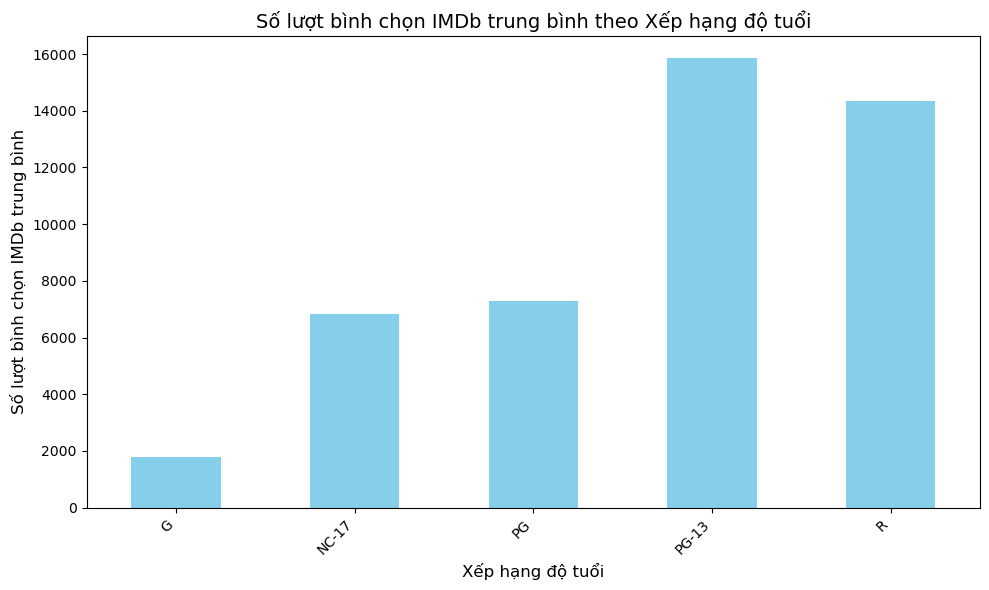

In [8]:
age_rating_avg_votes = age_rating_stats['mean']

plt.figure(figsize=(10, 6))
age_rating_avg_votes.plot(kind='bar', color='skyblue')
plt.title('Số lượt bình chọn IMDb trung bình theo Xếp hạng độ tuổi', fontsize=14)
plt.xlabel('Xếp hạng độ tuổi', fontsize=12)
plt.ylabel('Số lượt bình chọn IMDb trung bình', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Nhận xét: 
- Phim nhắm đến khán giả thanh thiếu niên và người trưởng thành (PG-13 và R) có mức độ phổ biến cao nhất, thể hiện qua số lượt bình chọn IMDb trung bình cao hơn đáng kể so với các nhóm khác.
- Phim dành cho trẻ em hoặc mọi lứa tuổi (G và PG) thường có mức độ phổ biến thấp hơn, có thể do đối tượng khán giả mục tiêu ít tham gia bình chọn trên IMDb.
- NC-17 không phải là xếp hạng lý tưởng để thu hút sự phổ biến rộng rãi, do đối tượng khán giả bị giới hạn.

#### Kết luận chung:
- Các nhà làm phim nên nhắm đến các đối tượng khán giả tuổi thanh thiếu niên (PG-13) hoặc trưởng thành (R) để tăng sức hút và mức độ phổ biến của phim trên thị trường.
- Đối với các bộ phim dành cho trẻ em hoặc gia đình, cần có chiến lược khác (ví dụ: tiếp thị trên các nền tảng không phụ thuộc vào đánh giá của khán giả trưởng thành như IMDb) để gia tăng mức độ nhận diện và thu hút khán giả mục tiêu.